<a href="https://colab.research.google.com/github/OlandezVoador/SI_atividades/blob/gold/Lab_2_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistemas Inteligentes

## Laboratório 2 - Classificação

Neste laboratório serão introduzidos: **Linear Discriminant Analysis (LDA)**, **Support Vector Machine (SVM)** e **Artificial Neural Networks (ANN)**.

### Identificação do Aluno

#### Nome Completo

Felipe Banes Lopes Ferreira

#### RA

21076215

### Importação e preparação dos dados

Importe o pacote **datasets** da biblioteca **sklearn**, então carregue o dataset de imagens de dígitos, utilizando a função **load_digits()** do pacote de datasets importado, já atribuindo-o à variável **digits_dataset**.

In [35]:
from sklearn.datasets import fetch_lfw_people
from sklearn.datasets import load_digits
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt

In [41]:
def plotar(valor):
  plt.figure(figsize=(8, 6))
  sns.heatmap(valor, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
  plt.xlabel('Predito')
  plt.ylabel('Real')
  plt.title('Matriz de Confusão')
  plt.show()

Tendo feito o processo adequadamente, a variável **digits_dataset** conterá todo o dataset correspondente, inclusive com informações que não são de nosso interesse para esta atividade. Para selecionar apenas o que é de nosso interesse, atribua à variável **digits_img** apenas o objeto **images** de **digits_dataset**.

Utilize a função **reshape** para forçar um formato unidimensional para cada imagem dentro da matriz original.

Note que o número de imagens não pode ser alterado, tampouco as imagens em si; apenas o formato da representação de cada uma dessas imagens pode sofrer alteração.

Então, atribua o objeto **target** de **digits_dataset** à variável **digits_target**.

In [10]:
# Preparação do dataset

digits_img = load_digits().images.reshape(digits_img.shape[0], - 1)
digits_target = digits_dataset.target

#### Divisão dos dados em grupos para treinamento e teste.

Importe e utilize a função **train_test_split** (do pacote **model_selection**, que percente à biblioteca **sklearn**) para dividir os dados de entrada e saída, **digits** e **digits_target**, respectivamente, separando-os em dados de treinamento e de testes para entrada e saída, ou seja, **x_train**, **x_test**, **y_train** e **y_test**.

Separe 25% para testes utilizando o argumento *test_size* da própria função **train_test_split**.

In [11]:
from sklearn.model_selection import train_test_split as teste
x_train, x_test, y_train, y_test = teste(digits_img, digits_target, test_size=0.25)

### Linear Discriminant Analysis (LDA)

#### Treinamento

Importe o classificador do LDA, que é uma função chamada **LinearDiscriminantAnalysis** do pacote **discriminant_analysis**, que faz parte da biblioteca **sklearn**. Então crie o classificador com o nome **LDA** atribundo a ele a função **LinearDiscriminantAnalysis** utilizando **solver='lsqr'**).

Treine o classificador **LDA** por meio de sua própria função **fit()**. Os argumentos da função **fit()** são os dados de entrada e saída de treinamento, ou seja, **x_train** e **y_train**.

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis(solver='lsqr')

In [16]:
# TREINAMENTO DO MODELO
LDA = LDA.fit(x_train, y_train)

#### Classificação e Resultados

Então, faça a classificação (também chamada de predição), utilizando a função **predict()** do próprio classificador **LDA**. O argumento da função é apenas a entrada de teste, ou seja, **x_test**. Atribua a saída dessa classificação à variável **y_pred_LDA**.

In [17]:
# ALGORITMO DE PREDIÇÃO DO MODELO TREINADO
y_pred_LDA = LDA.predict(x_test)

Para analisar os resultados, precisamos utilizar algumas ferramentas e métricas. A biblioteca **sklearn** possui um grande conjunto de funções para essa finalidade em seu pacote **metrics**. Importe as funções **accuracy_score** e **confusion_matrix**, então imprima a acurácia do classificador lda e sua confusion matrix.

In [18]:
# Acurácia do classificador
from sklearn.metrics import accuracy_score

# Matriz de confusão
from sklearn.metrics import confusion_matrix

In [22]:
precisao = accuracy_score(y_test,y_pred_LDA)
print(precisao)

0.9666666666666667


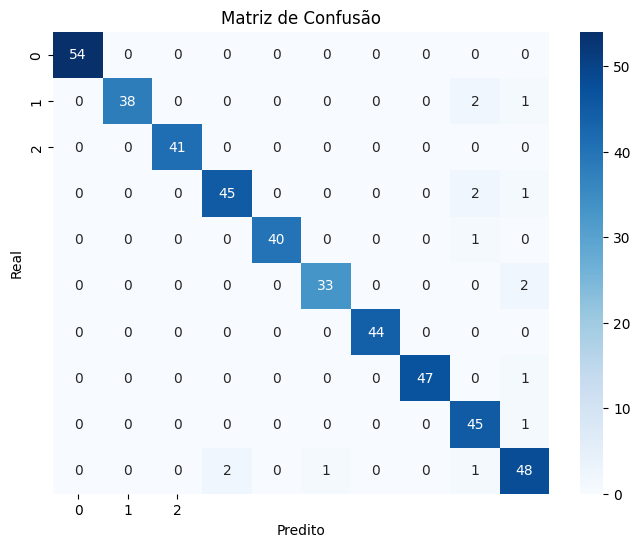

In [42]:
precisao = confusion_matrix(y_test, y_pred_LDA)
plotar(precisao)

### Support Vector Machine (SVM)

#### Treinamento

Importe a função **SVC**, pertencente ao pacote **SVM** da biblioteca **sklearn**, então crie o classificador chamado **SVM**, análogo ao que foi feito com o LDA anteriormente. Utilize os parâmetros **C=1.0**, **kernel='poly'** e **degree=3**.

Então, treine o classificador **SVM** utilizando a função **fit** com os dados de treinamento, **x_train** e **y_train**, respectivamente.

In [25]:
from sklearn.svm import SVC
SVM_class = SVC(C=1.0, kernel='poly', degree=3)

In [27]:
# TREINAMENTO DO MODELO
SVM_class = SVM_class.fit(x_train, y_train)

#### Classificação e Resultados

Faça a classificação dos dados de entrada para testes, **x_test**, utilizando a função **predict** do próprio **SVM** e armazene os resultados em **y_pred_SVM**.

Na mesma célula, verifique a acurácia do classificador **SVM** por meio da função **accuracy_score** e mostre a matriz de confusão do classificador **SVM** utilizando a função **confusion_matrix**.

In [28]:
# ALGORITMO DE PREDIÇÃO DO MODELO TREINADO
y_pred_SVM = SVM_class.predict(x_test)

In [31]:
# Acurácia do classificador
from sklearn.metrics import accuracy_score

# Matriz de confusão
from sklearn.metrics import confusion_matrix

In [30]:
precisao = accuracy_score(y_test, y_pred_SVM)
print(precisao)

0.9933333333333333


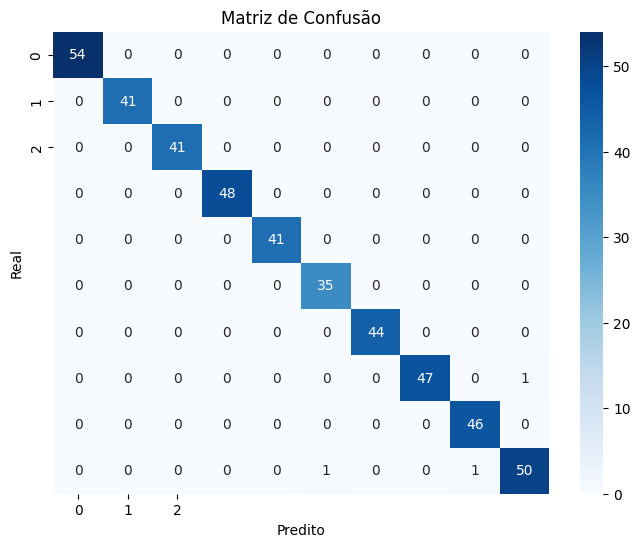

In [37]:
precisao = confusion_matrix(y_test, y_pred_SVM)
plotar(precisao)

### Artificial Neural Networks (ANN)

#### Treinamento

Importe a função **MLPClassifier**, pertencente ao pacote **neural_network** da biblioteca **sklearn**, então crie o classificador **ANN** usando a função importada com os parâmetros **solver='lbfgs'** e **hidden_layer_sizes=(50)**.

Depois, treine o classificador usando os dados de entrada e saída de treinamento.

In [45]:
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(50))

#### Classificação e Resultados

Faça a predição com base nos dados de entrada de teste com o classificador **ANN**, atribundo as predições à variável **y_pred_ANN**. Então imprima a acurácia e a matriz de confusão dessa classificação.

In [48]:
# TREINAMENTO DO MODELO
ANN = ANN.fit(x_train, y_train)

In [54]:
# ALGORITMO DE PREDIÇÃO DO MODELO TREINADO
y_pred_ANN = ANN.predict(x_test)

In [52]:
# Acurácia do classificador
from sklearn.metrics import accuracy_score

# Matriz de confusão
from sklearn.metrics import confusion_matrix

In [56]:
precisao = accuracy_score(y_test, y_pred_ANN)
print(precisao)

0.9777777777777777


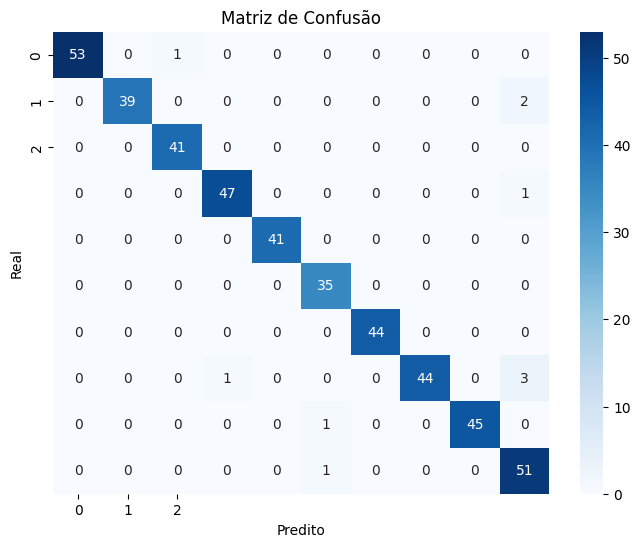

In [57]:
precisao = confusion_matrix(y_test, y_pred_ANN)
plotar(precisao)

#### Análise para diferentes quantidades de neurônios

Faça, iterativamente, com que seja treinada e testada uma rede neural de uma camada, utilizando uma quantidade crescente de neurônios, indo de 1 a 50. Armazene o valor da acurácia para cada iteração, então imprima as seguintes estatísticas sobre a acurácia: mínima, máxima, média, mediana, moda, variância e desvio padrão.

In [60]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from statistics import mean, median, mode, variance, stdev

neurons_range = range(1, 51)
accuracies = []

for n in neurons_range:
    # Criar e treinar o modelo
    model = MLPClassifier(hidden_layer_sizes=(n), max_iter=1000)
    model.fit(x_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = model.predict(x_test)

    # Calcular e armazenar a acurácia
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Imprimir estatísticas sobre a acurácia
print(f"Mínima: {min(accuracies)}")
print(f"Máxima: {max(accuracies)}")
print(f"Média: {mean(accuracies)}")
print(f"Mediana: {median(accuracies)}")
print(f"Moda: {mode(accuracies)}")
print(f"Variância: {variance(accuracies)}")
print(f"Desvio Padrão: {stdev(accuracies)}")

Mínima: 0.2733333333333333
Máxima: 0.9866666666666667
Média: 0.9416
Mediana: 0.9677777777777778
Moda: 0.9644444444444444
Variância: 0.01222595918367347
Desvio Padrão: 0.11057105943090836


Utilizando subplots, gere o gráfico da acurácia do classificador para cada quantidade de neurônios na camada da rede neural e o gráfico do erro, considerando como o erro o quadrado da diferença entre as acurácias das últimas duas iterações.

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

params = {'figure.figsize': [10, 6],
          'axes.labelsize': 16,
          'axes.titlesize':18,
          'font.size': 16,
          'legend.fontsize': 12,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12
         }

plt.rcParams.update(params)

### INSIRA SEU CÓDIGO AQUI ###

## Referências

[Scikit-Learn - Datasets](http://scikit-learn.org/stable/datasets/index.html)

[Matplotlib - Pyplot](https://matplotlib.org/api/pyplot_summary.html)

[Numpy](https://docs.scipy.org/doc/numpy/reference/)

[Scikit-Learn - Train, Test and Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Scikit-Learn - LinearDiscriminantAnalysis](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

[Scikit-Learn - SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

[Scikit-Learn - MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

[Scikit-Learn - Accuracy Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Scikit-Learn - Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)